In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Membuat dataset sintesis untuk harga rumah
np.random.seed(42)
n_samples = 100

In [ ]:
# Membuat data training
data_training = {
    'LuasBangunan': np.random.normal(120, 30, n_samples),
    'JumlahKamar': np.random.randint(2, 6, n_samples),
    'Harga': None
}

In [ ]:
# Membuat hubungan linear dengan noise
data_training['Harga'] = (
    2000 * data_training['LuasBangunan'] +
    50000 * data_training['JumlahKamar'] +
    np.random.normal(0, 50000, n_samples)
)

In [ ]:
# Membuat DataFrame training
df = pd.DataFrame(data_training)
df.to_csv('dataset_rumah_training.csv', index=False)

In [ ]:
# Membuat data testing (20 sampel)
n_test = 20
data_testing = {
    'Nama': [f'Rumah_{i+1}' for i in range(n_test)],
    'LuasBangunan': np.random.normal(120, 30, n_test),
    'JumlahKamar': np.random.randint(2, 6, n_test),
    'Harga': None
}

In [ ]:
data_testing['Harga'] = (
    2000 * data_testing['LuasBangunan'] +
    50000 * data_testing['JumlahKamar'] +
    np.random.normal(0, 50000, n_test)
)

In [ ]:
# Membuat DataFrame testing
df1 = pd.DataFrame(data_testing)
df1.to_csv('dataset_rumah_testing.csv', index=False)

In [ ]:
# Membaca data training
df = pd.read_csv('dataset_rumah_training.csv')

In [ ]:
# Melakukan regresi OLS
X = df[["LuasBangunan", "JumlahKamar"]].to_numpy()
y = df["Harga"].to_numpy()
X = sm.add_constant(X)
model_prediksi = sm.OLS(y, X).fit()
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     135.0
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           9.41e-29
Time:                        23:56:22   Log-Likelihood:                -1221.7
No. Observations:                 100   AIC:                             2449.
Df Residuals:                      97   BIC:                             2457.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5891.6755   2.67e+04     -0.221      0.8

In [ ]:
# Membaca data testing
df1 = pd.read_csv('dataset_rumah_testing.csv')
X_test = df1[["LuasBangunan", "JumlahKamar"]].to_numpy()
y_real = df1["Harga"].to_numpy()
y_nama = df1["Nama"].to_numpy()
X_test = sm.add_constant(X_test)
y_pred = model_prediksi.predict(X_test)

In [ ]:
# Membuat DataFrame hasil prediksi
hasil_prediksi = pd.DataFrame()
hasil_prediksi["Nama Properti"] = y_nama
hasil_prediksi["Harga Real"] = y_real
hasil_prediksi["Harga Prediksi"] = y_pred
hasil_prediksi["ERROR"] = hasil_prediksi["Harga Real"] - hasil_prediksi["Harga Prediksi"]
hasil_prediksi["PERSEN PREDIKSI"] = 1.0 - (abs(hasil_prediksi["ERROR"])/hasil_prediksi["Harga Real"])
hasil_prediksi["PERSEN"] = hasil_prediksi["PERSEN PREDIKSI"] * 100

In [ ]:
# Menyimpan hasil prediksi
hasil_prediksi.to_csv('hasil_prediksi_rumah.csv')

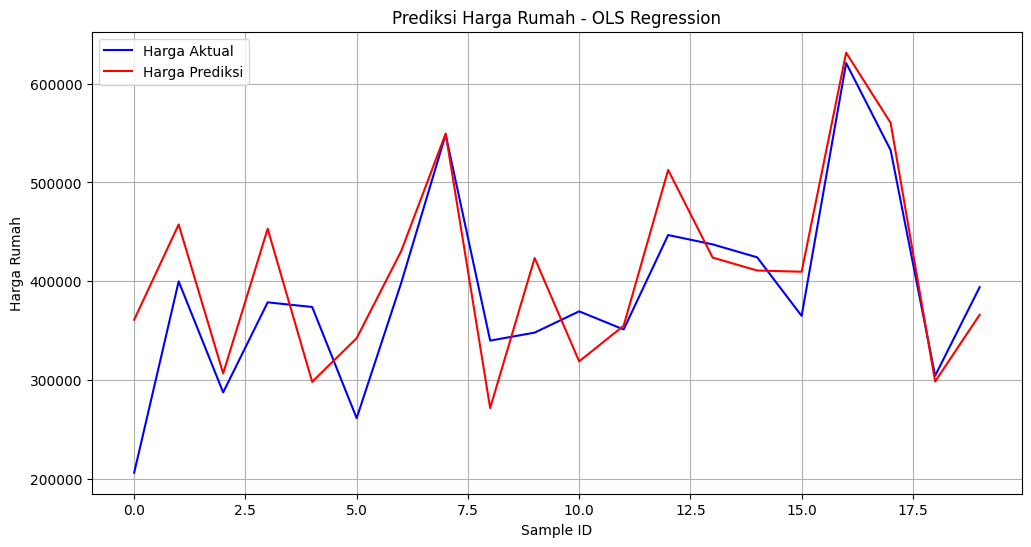

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))
x = range(len(hasil_prediksi))
plt.plot(x, hasil_prediksi["Harga Real"], label="Harga Aktual", color="b")
plt.plot(x, hasil_prediksi["Harga Prediksi"], label="Harga Prediksi", color="r")
plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Harga Rumah')
plt.title('Prediksi Harga Rumah - OLS Regression')
plt.grid(True)
plt.show()

In [ ]:
hasil_prediksi.head()

,Nama Properti,Harga Real,Harga Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,Rumah_1,206428.077797,361172.132330,-154744.054533,0.250373,25.037303
1,Rumah_2,399967.876819,457499.210065,-57531.333245,0.856160,85.616012
2,Rumah_3,287664.404544,306877.330899,-19212.926355,0.933211,93.321062
3,Rumah_4,378756.840990,453175.588432,-74418.747442,0.803518,80.351841
4,Rumah_5,374069.320891,298363.909675,75705.411215,0.797617,79.761663
